# Table of Contents
* [Periodization, discretization and sampling](#Periodization,-discretization-and-sampling)
	* [Periodization-discretization duality](#Periodization-discretization-duality)
		* [Relation between Fourier series and Fourier transform](#Relation-between-Fourier-series-and-Fourier-transform)
		* [Poisson summation formulas](#Poisson-summation-formulas)


In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


# Periodization, discretization and sampling

## Periodization-discretization duality

### Relation between Fourier series and Fourier transform

\index{Fourier transform!Link with Fourier series|end}

Remember that we defined the Fourier transform as the limit of the Fourier series of periodic signal, when the period tends to infinity. A periodic signal can also be viewed as the repetition of a basic pattern. This enables to give a link between Fourier series and transform. 
Let $x(n)$ be a periodic function with period $L_0$. Then
\begin{equation}
\eqboxb{\displaystyle{
x(n) = \sum_{m=-\infty}^{+\infty} x_{L_0} (n-mL_0)},
}
\end{equation}
where $x_{L_0} (n)$ is the basic pattern with length $L_0$.
$x(n)$ being periodic, it can be expressed using a Fourier series, as
\[
x(n) = \sum_{n=0}^{L_0-1} c_k e^{j2\pi kf_0 n},
\]
where $f_0 = 1/L_0$ and
\[
c_k = \frac{1}{L_0} \sum_{[L_0]} x_{L_0} (n) e^{-j2\pi kf_0 n}.
\]
From this relation, we immediately have
\begin{equation}
c_k = \frac{1}{L_0} X_{L_0} (kf_0),
\end{equation}
where $X_{L_0} (f)$ is the Fourier transform of the pattern $x_{L_0} (n)$.
Hence
\begin{equation}
\eqboxb{
\displaystyle{x(n) = \sum_{m=-\infty}^{+\infty} x_{L_0} (n-mL_0) = \frac{1}{L_0}\sum_{k=0}^{L_0-1} 
 X_{L_0} (kf_0) e^{j2\pi kf_0 n}}.
}
\end{equation}
From that, we deduce that the Fourier transform of $x(n)$ writes
\[
\tf{x(n)} = \frac{1}{L_0}\sum_{k=0}^{L_0-1} 
 X_{L_0} (kf_0) \tf{e^{j2\pi kf_0 n}},
\]
that is
\begin{equation}
\eqboxc{
\displaystyle{X(f) = \tf{x(n)} = \frac{1}{L_0}\sum_{k=0}^{L_0-1} 
 X_{L_0} (kf_0) \delta(f-kf_0)}
}.
\end{equation}

### Poisson summation formulas

Hence, we see that the Fourier transform of a periodic signal with period $L_0$ is  constituted of a series of Dirac impulse, spaced by  $f_0$, and whose weights are the Fourier transform of the initial pattern, taken at the respective frequencies. 

<div class=mybox>
\textem{Periodicity in the time domain yields spectral lines in the frequency domain.}
</div>


Taking $x_{L_0}(n) = \delta(n)$, we obtain the first \textem{Poisson's formula}:
\begin{equation}
\eqboxc{\displaystyle{
\sum_{m=-\infty}^{+\infty} \delta (n-mL_0) = 
\frac{1}{L_0}\sum_{k=0}^{L_0-1} e^{j2\pi kf_0 n}}}. \label{eq:Poisson1}
\end{equation}

The series of delayed Dirac impulses is called a \textem{Dirac comb}. It is often denoted 
\begin{equation}
\sha_{L_0}(n)=\sum_{m=-\infty}^{+\infty} \delta (n-mL_0). \label{eq:DiracComb}
\end{equation}
Taking the Fourier transforms of the two sides of (\ref{eq:Poisson1}), we obtain
\begin{equation}
\eqboxc{
\displaystyle{
\sum_{m=-\infty}^{+\infty} e^{j2\pi fmL_0 n} = 
\frac{1}{L_0}\sum_{k=0}^{L_0-1} \delta(f -kf_0)}};
\end{equation}
that is the second \textem{Poisson's formula}:
\begin{equation}
\eqboxd{
\displaystyle{
\sum_{m=-\infty}^{+\infty} \delta (n-mL_0) \flecheTF
\frac{1}{L_0}\sum_{k=0}^{L_0-1} \delta(f -kf_0)}}. \label{eq:Poisson2}
\end{equation}
This last relation shows that the Fourier transform of a Dirac comb is also a Dirac comb, these two combs having an inverse spacing.
 

\begin{exercise}
Let us check this numerically. This is very easy: define a Dirac comb, take its Fourier transform using the `fft` function, and look at the result. 
\end{exercise}

In [2]:
## DO IT YOURSELF...
#DiracComb=
#DiracComb_f=fft(DiracComb)
#etc

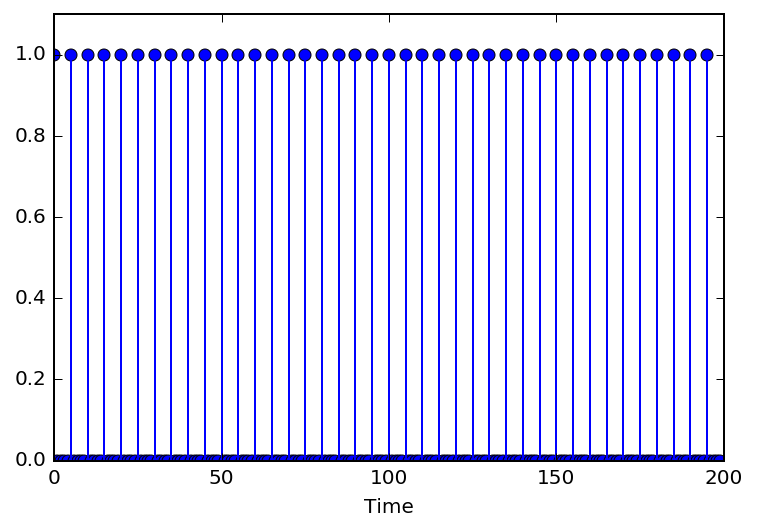

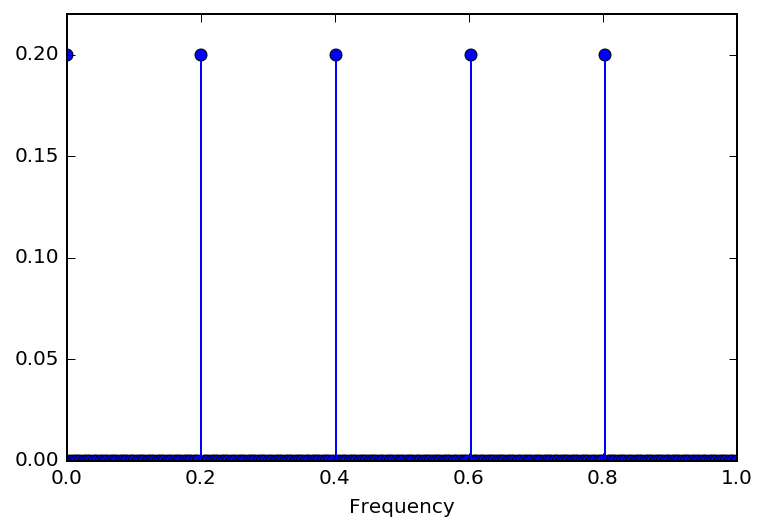

In [3]:
N = 200
L0 = 5
DiracComb = np.zeros(N)
DiracComb[::L0] = 1
DiracComb_f = fft(DiracComb)
plt.stem(DiracComb)
plt.ylim([0, 1.1])
plt.xlabel("Time")
plt.figure()
f = np.linspace(0, 1, N)
plt.stem(f, 1 / N *
         abs(DiracComb_f))  # Actually there is a factor N in the fft
_ = plt.ylim([0, 1.1 * 1 / L0])
plt.xlabel("Frequency")

We may now go back to the exploration of the links between Fourier series and transform, using the second Poisson formula (\ref{eq:Poisson2}). 

\textbf{Convolution with a delayed Dirac impulse} - Let us first look at the result of the convolution of any function with a delayed Dirac impulse: let us denote $\delta_{n_0}(n)=\delta(n-n_0)$. The convolution $[x*\delta_{n_0}](n)$ is eq given by
\begin{align}
[x*\delta_{n_0}](n) & =  \sum_m x(m) \delta_{n_0}(n-m)  \\
 & =  \sum_m x(m) \delta(n-m-n_0) \\
  & =    x(n-n_0) \\
 \end{align}
where the last relation follows by the representation formula. Hence 
<div class=mybox>
\textem{Convolution with a delayed Dirac delays the signal.}
</div>
This has a simple and direct filtering interpretation. Indeed, if a filters has for impulse response a delayed Dirac impulse, then this means that it is a pure delaying filter. Then to an input $x(n)$ corresponds an output $x(n-n_0)$. <br><br>


\textbf{Convolution with a Dirac comb} - By linearity, the convolution of any signal $x_L(n)$ of length $L$ with a Dirac comb results in the sum of the delayed responses:
\begin{align}
x(n) = \left[x_L*\sha_{L_0}\right](n)  & = \left[x_L*\sum_k \delta_{k L_0}\right](n) \\
& =  \sum_k [x_L*\delta_{k L_0}](n)  \\
  & =   \sum_k x_L(n-k L_0). \\
 \end{align}
This is nothing but the expression of a periodic signal. If $L_0$ is larger than the support $L$  of $x_L(n)$, then $x(n)$ is simply the repetition, with a period $L_0$, of the pattern $x_L(n)$. 
<div class=mybox>
\textem{Convolution with a Dirac comb periodizes the signal.}
</div>

\begin{exercise}\label{exo:periodizationViaConvolution}
Let us check this with some simple Python commands: create a Dirac comb, a test signal (e.g.) a  rectangular pulse, convolve the two signals and plot the result. *Experiment with the value $L$ of the length of the test signal*. 
\end{exercise}

In [3]:
# DO IT YOURSELF!
#DiracComb=
#pulse=
#...
#z=np.convolve(DiracComb,pulse)
#plt.stem(...)

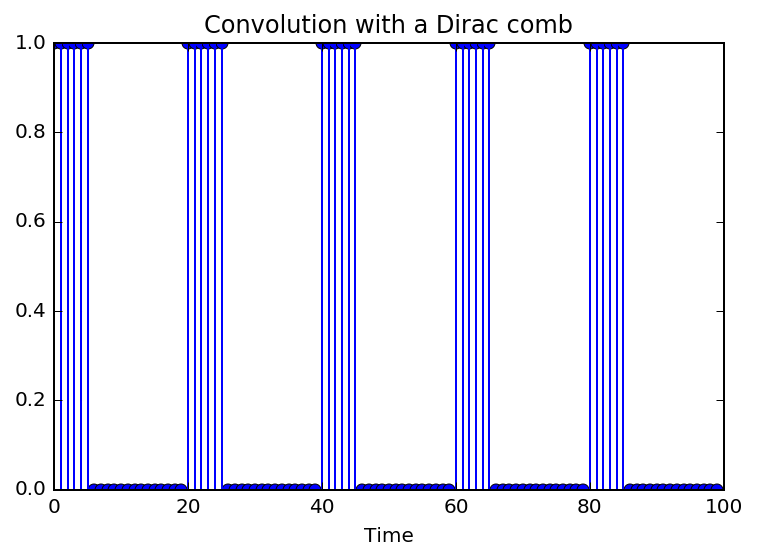

In [5]:
N=400; L0=20; L=6 # L is the length of the pulse
DiracComb=np.zeros(N)
DiracComb[::L0]=1
pulse=np.zeros(40); pulse[0:L]=1 #or range(L) # <<--
z=np.convolve(DiracComb,pulse)
plt.stem(z[0:100])
plt.title('Convolution with a Dirac comb')
plt.xlabel('Time')

We see that the convolution with the Dirac comb effectively periodizes the initial pattern. In the case where the support $L$ of the pulse if larger than the period $L_0$ of the comb, then the result presents \textem{aliasing} between consecutive patterns (but the resulting signal is still periodic). 

\textbf{Effect in the frequency domain} - In the frequency domain, we know, by the Plancherel theorem, that the product of signals results in the convolution of their Fourier transforms (and *vice versa*). As a consequence, 
$$
x(n) = \left[x_L*\sha_{L_0}\right](n) \flecheTF X_L(f). \tf{\sha_{L_0}(n)}.
$$
Since the Fourier transform of a Dirac comb is also a Dirac comb, we obtain that
$$
x(n) = \left[x_L*\sha_{L_0}\right](n) \flecheTF X_L(f). \frac{1}{L_0}\sha_\frac{1}{L_0}(f),
$$
or
$$
X(f) = X_L(f). \frac{1}{L_0}\sha_\frac{1}{L_0}(f) =\frac{1}{L_0}\sum_k X_L(kf_0) \delta(f-kf_0),
$$
with $f_0={1}/{L_0}$. We see that the Fourier transform of the periodized signal is the product of the Fourier transform of the initial pattern with a Dirac comb in frequency. Hence, periodization in the time domain results in a discretization of the frequency axis, yielding a Fourier transform constituted of spectral lines. Observe that the amplitudes of the spectral lines coincide with the Fourier series coefficients. hence it is immediate to find the Fourier series coefficients from the Fourier transform of the periodized pattern.

\begin{textboxa}
\textem{Periodization in the time domain results in a discretization in the frequency domain.}
\end{textboxa}


\begin{exercise}
Continue the exercise \ref{exo:periodizationViaConvolution} by an analysis of what happens in the Fourier domain: compute the Fourier transforms of the original and periodized signals and compare them on the same plot. The Fourier transform of the periodized signal should be computed *without* zero padding, ie exactly on $N$ points.

You will have to introduce a factor to account for the fact that there is more signal in the periodized one yan in the initial - the factor to consider is simply the number of periods.
\end{exercise}

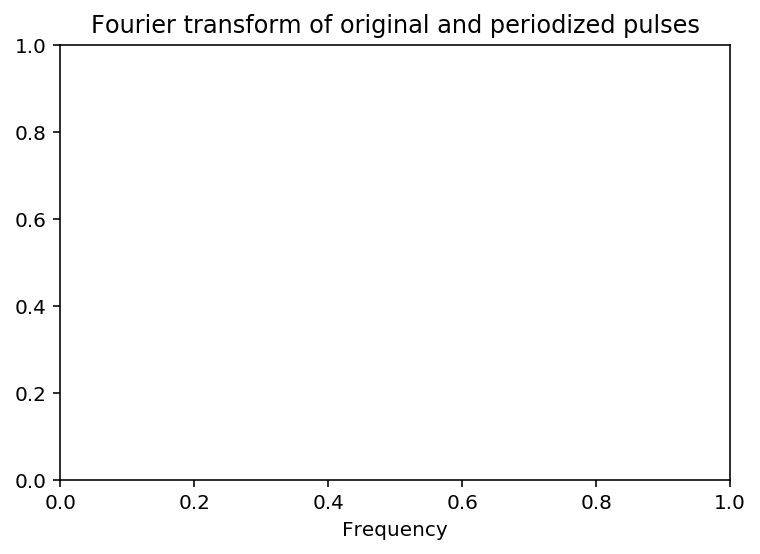

In [5]:
#
N = 200
MM = 2000  #for zero padding
plt.figure()
f = np.linspace(0, 1, MM)
fn = np.linspace(0, 1, N)
#
# FILL IN HERE
#
plt.title('Fourier transform of original and periodized pulses')
_ = xlabel('Frequency')

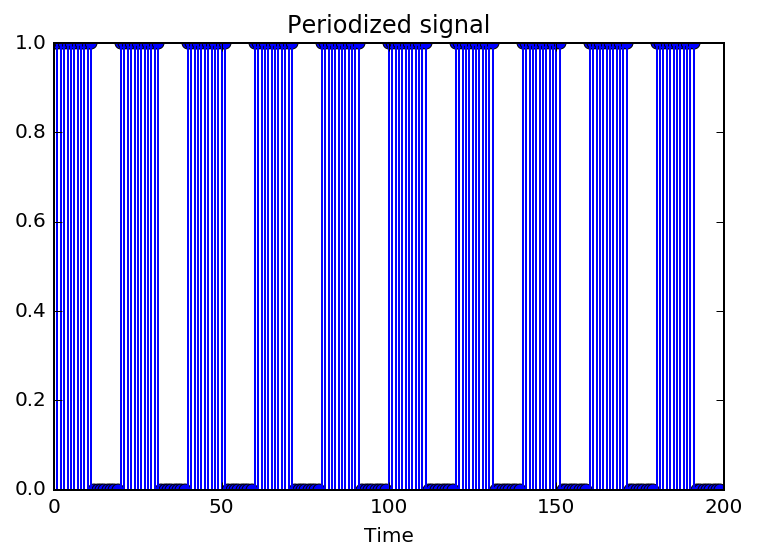

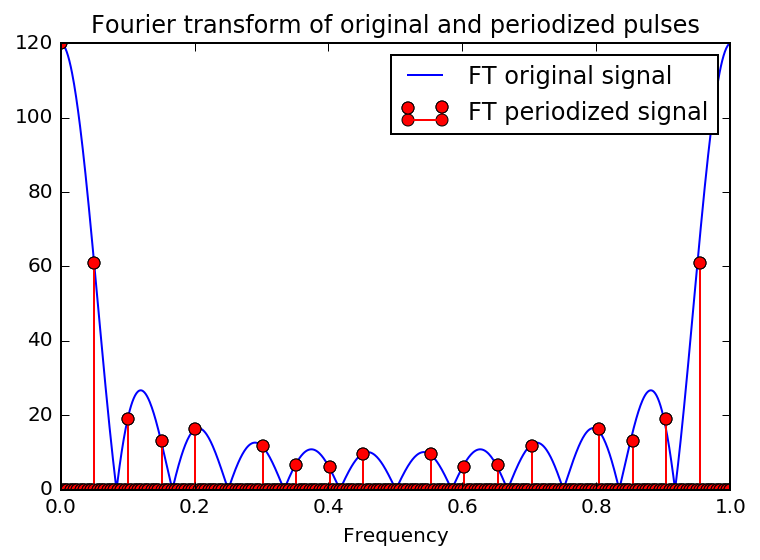

In [7]:
%matplotlib inline
N = 200
L0 = 20
L = 12  # L is the length of the pulse
DiracComb = np.zeros(N)
DiracComb[::L0] = 1
pulse = np.zeros(40)
pulse[0:L] = 1  #exp(-0.3*arange(L))
z = np.convolve(DiracComb, pulse)
plt.stem(z[0:200])
plt.title('Periodized signal')
plt.xlabel('Time')
#
MM = 1000
plt.figure()
f = np.linspace(0, 1, MM)
fn = np.linspace(0, 1, N)
plt.plot(f, 10 * abs(fft(pulse, MM)), label="FT original signal")
plt.stem(fn, abs(fft(z, N)), '-or', label="FT periodized signal")
plt.legend()
plt.title('Fourier transform of original and periodized pulses')
_ = xlabel('Frequency')


----
<div align=right> [Index](toc.ipynb) - [Back](Continuous_time_case.ipynb) - [Next](DFT.ipynb)</div>